In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sci
from scipy.optimize import curve_fit
conv_fpi_cal = 9.018518518518518e-05
conv_value = 68.445766667

In [2]:
def Lorentzian(x, amp1, cen1, wid1, offset):
       return (amp1 * wid1 ** 2/((x-cen1) ** 2 + wid1**2))+ offset

In [3]:
def returnConv(peaks,x,y):
    peaksy = []
    peaksx = []
    i = 0
    for x1 in peaks:
        peaksy.append(y[i])
        peaksx.append(x[i])
        i += 1
    i = 0
    dist = []
    for peak in peaksx:
        if(i <  len(peaksx)-1):
            peaksx[i+1]
            dist.append(peaksx[i+1]-peaksx[i])
        i += 1
    print(dist)
    avg_dis = sum(dist)/len(dist)
    print("Average: " + str(avg_dis))
    abw = np.sqrt((1/len(dist)) * sum([(a - avg_dis)**2 for a in dist]))
    print(abw)
    conv = (0.28011724376544545)/avg_dis
    return conv

[1, 1, 1]
Average: 1.0
0.0
0.28011724376544545


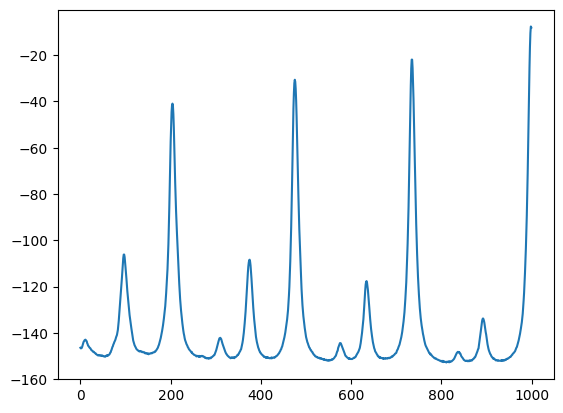

In [4]:
data = np.loadtxt('C:/Users/vasob/OneDrive/Documents/FP/P07/Messwerte/druckbreit/200mBar.txt')
x = []
y = []
i = 0
for row in data:
        x.append(i)
        y.append(row[0])
        i += 1
peaks, _ = sci.find_peaks(y, -60, distance = 50)
conv = returnConv(peaks,x,y)
print(conv)
#print(avg_dis*conv)
plt.plot(x, y, linestyle = "-")
#plt.plot(np.multiply(peaksx,conv), peaksy, marker = "x", linestyle = "")
plt.show()

In [205]:
data = np.loadtxt('C:/Users/vasob/OneDrive/Documents/FP/P07/Messwerte/final/final1.txt')
fpi = []
pow = []
iod = []
oxy = []
x = []
i = 0
xbasic = []
for dat in data:
    x.append(dat[0])
    fpi.append(dat[1])
    pow.append(dat[2])
    iod.append(dat[3])
    oxy.append(dat[4])
    xbasic.append(i)
    i += 1


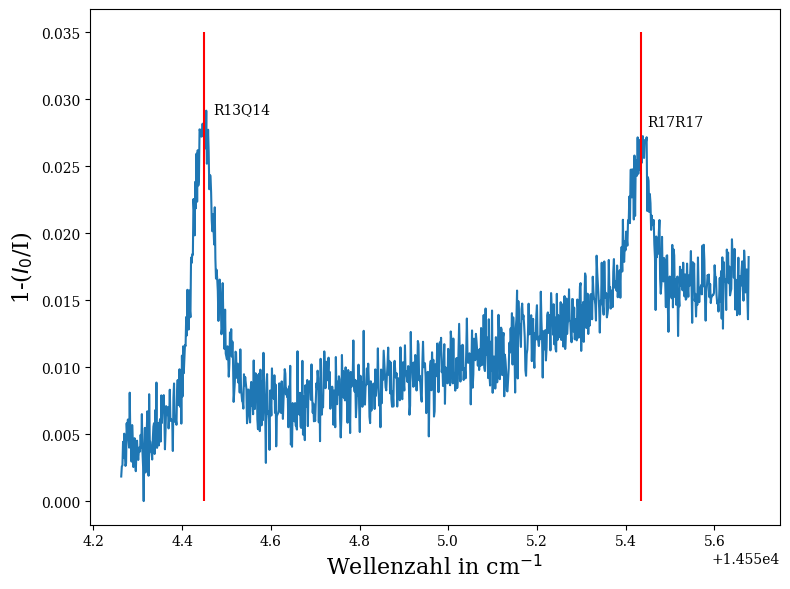

In [199]:
I = -(max(oxy)/oxy)+1
plt.figure(figsize=(8,6))
plt.rcParams.update ({"figure.autolayout": True, "font.family": "serif"})
plt.xlabel("Wellenzahl in cm$^{-1}$",fontsize=16)
plt.text(1.455e4 + 4.47, 0.029, "R13Q14")
plt.text(1.455e4 + 5.45, 0.028, "R17R17")
plt.ylabel("1-($I_0$/I)",fontsize=16)
plt.plot(x,I)
plt.vlines([1.455e4 + 4.45, 1.455e4 + 5.435],0,0.035, color = "red")

[]


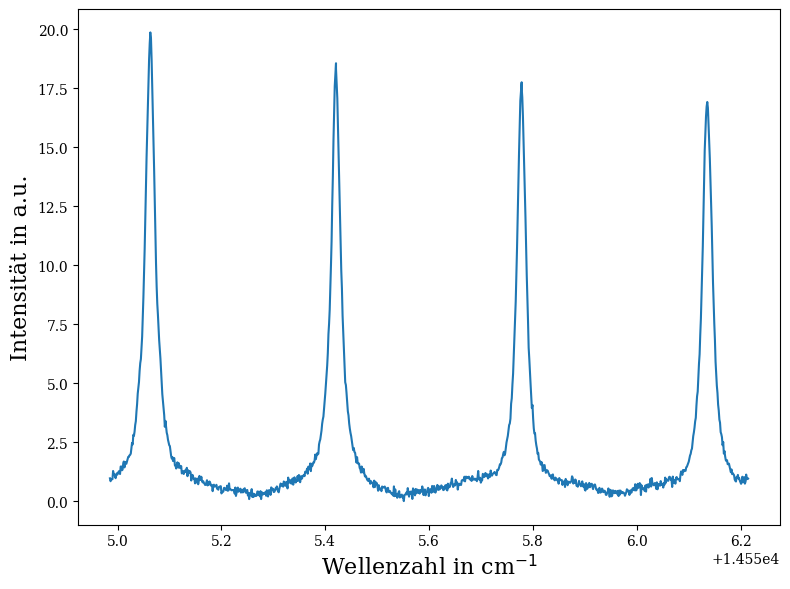

In [206]:
x_1 = [x1-14550 for x1 in x]

xmask = np.ma.masked_array(x_1, mask = [(a < 4.4) or (a > 4.6) for a in x_1], fill_value=0)
xmaskk = []
ymaskk = []
i = 0

for x1 in xmask:
    if(x1 != 0):
        xmaskk.append(x_1[i])
        ymaskk.append(iod[i])
    i += 1
peaks,_ = sci.find_peaks(xmaskk,-132, distance=15)

peaksy = []
peaksx = []
i = 0
for x1 in peaks:
    peaksy.append(iod[x1])
    peaksx.append(x_1[x1])
    i += 1
i = 0

dist = []
for peak in peaksx:
    if(i <  len(peaksx)-1):
        peaksx[i+1]
        dist.append(peaksx[i+1]-peaksx[i])
    i += 1
print(dist)
#avg_dis = sum(dist)/len(dist)
#abw = np.sqrt((1/len(dist)) * sum([(a - avg_dis)**2 for a in dist]))
#print("Average: " + str(avg_dis) + " +/- " + str(abw))
#print(abw)
#conv = (0.28011724376544545)/avg_dis

plt.figure(figsize=(8,6))
plt.rcParams.update ({"figure.autolayout": True, "font.family": "serif"})
plt.xlabel("Wellenzahl in cm$^{-1}$",fontsize=16)
plt.ylabel("Intensität in a.u.", fontsize=16)
plt.plot(x,np.add(fpi, -min(fpi)))
#plt.plot(peaksx, peaksy, linestyle = "", marker = "x")

[ 151  328  500 3376 3492 3659 6428 6595 6760 9479 9646 9811]
[177, 172, 2876, 116, 167, 2769, 167, 165, 2719, 167, 165]
[2876, 2769, 2719]
2788.0 +/- 65.4879123706556
9.074605451936873e-05


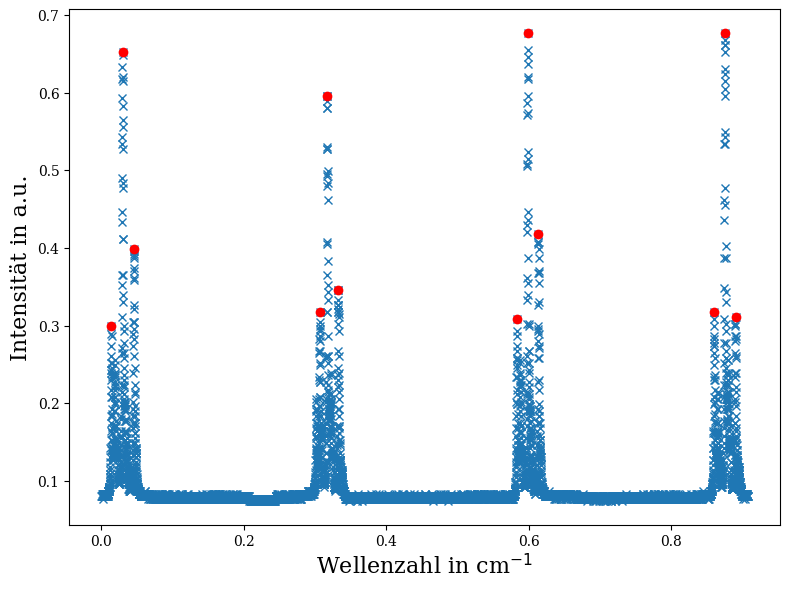

In [211]:
data = np.loadtxt("C:/Users/vasob/OneDrive/Documents/FP/P07/Messwerte/fpi_cal/cal_3.txt")
x = []
y = []
i = 0
for row in data:
        x.append(i)
        y.append(row[0])
        i += 1

xmask = np.ma.masked_array(x, mask = [(a < 0) or (a > 10000) for a in x], fill_value=0)
xmaskk = []
ymaskk = []
i = 0
for x1 in xmask:
    if(x1 != 0):
        xmaskk.append(x[i])
        ymaskk.append(y[i])
    i += 1
peaks, _ = sci.find_peaks(ymaskk, 0.2, distance=100)
print(peaks)
peaksy = []
peaksx = []
i = 0
for x1 in peaks:
    peaksy.append(ymaskk[x1])
    peaksx.append(xmaskk[x1])
    i += 1
i = 0
distance = []
for peak in peaksx:
    if(i <  len(peaksx)-1):
        peaksx[i+1]
        distance.append(peaksx[i+1]-peaksx[i])
    i += 1
print(distance)
dist = []
for dis in distance:
    if(dis > 1000):
        dist.append(dis)
print(dist)
avg_dis = sum(dist)/len(dist)
abw = np.sqrt((1/len(dist)) * sum([(a - avg_dis)**2 for a in dist]))
print(str(avg_dis) + " +/- " + str(abw))
conv = 0.253/avg_dis
print(conv)
plt.figure(figsize=(8,6))
plt.rcParams.update ({"figure.autolayout": True, "font.family": "serif"})
plt.xlabel("Wellenzahl in cm$^{-1}$",fontsize=16)
plt.ylabel("Intensität in a.u.", fontsize=16)
plt.plot(np.multiply(xmaskk,conv), ymaskk, linestyle = "", marker = "x")
plt.plot(np.multiply(peaksx,conv), peaksy, color = "red", linestyle = "", marker = "o")
plt.show()



In [88]:
def bat(J, B1,B2):
    return 14525.6609 + (B1-B2)*(J)**2 + (3*B1 - B2)*J + 2*B1

[1.41732466 1.486959  ]
[0.02234164 0.02464565]


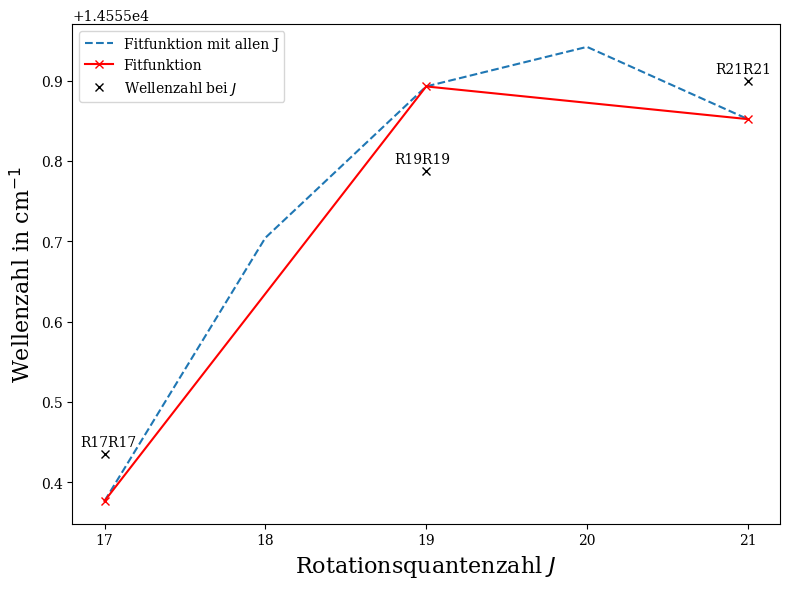

In [244]:
J = [21,19,17]
J = np.asarray(J)
v = [14555.9,14555.7875,14555.435]
params, conv = curve_fit(bat,J,v)
print(params)
fehler = np.sqrt(np.diagonal(conv))
print(fehler)

plt.figure(figsize=(8,6))
plt.axes().set_xticks([17,18,19,20,21])
plt.rcParams.update ({"figure.autolayout": True, "font.family": "serif"})
plt.ylabel("Wellenzahl in cm$^{-1}$",fontsize=16)
plt.xlabel("Rotationsquantenzahl $J$",fontsize=16)
x = range(17,22, 1)
x = np.asarray(x)
plt.plot(x, bat(x, *params), label = "Fitfunktion mit allen J", linestyle = "dashed")
plt.plot(J,bat(J, *params), color = "red", label = "Fitfunktion", marker = "x")
plt.text(J[0]-0.2, v[0]+0.01, "R21R21")
plt.text(J[1]-0.2, v[1]+0.01, "R19R19")
plt.text(J[2]-0.15, v[2]+0.01, "R17R17")
plt.plot(J,v, color = "black", label = "Wellenzahl bei $J$", marker = "x", linestyle = "")
plt.legend()

[111, 108]
[ 90 201 309]


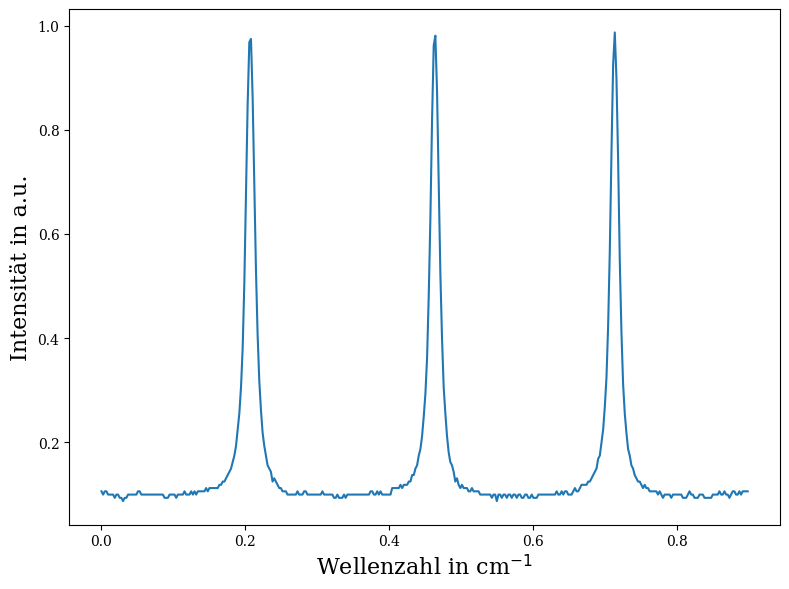

In [227]:
data = np.loadtxt("C:/Users/vasob/OneDrive/Documents/FP/P07/Messwerte/nonScan_DL_fpi.txt")
x = []
y = []
i = 0
for row in data:
    if i < 390:
        x.append(i)
        y.append(row[0])
        i += 1
peaks , _ = sci.find_peaks(y, height=0.2, distance = 50)
peaksx = peaks
i = 0
distance = []
for peak in peaksx:
    if(i <  len(peaksx)-1):
        peaksx[i+1]
        distance.append(peaksx[i+1]-peaksx[i])
    i += 1
dist = []
for dis in distance: 
    dist.append(dis)
print(dist)
avg_dis = sum(dist)/len(dist)
abw = np.sqrt((1/len(dist)) * sum([(a - avg_dis)**2 for a in dist]))
conv = 0.253/avg_dis
print(peaks)
x = np.asarray(x)
plt.figure(figsize=(8,6))
plt.rcParams.update ({"figure.autolayout": True, "font.family": "serif"})
plt.xlabel("Wellenzahl in cm$^{-1}$",fontsize=16)
plt.ylabel("Intensität in a.u.", fontsize=16)
plt.plot(x*conv,y)
